In [110]:
import poisson_atac as patac
from poisson_atac.utils import dataset_map_simple as dataset_map
import os
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
import scvelo as scv
import matplotlib.pyplot as plt

In [111]:
scv.set_figure_params()
sns.set_style('whitegrid')

In [112]:
save_path = '/lustre/groups/ml01/workspace/laura.martens/atac_poisson_data/data/metadata'

In [113]:
fig_path = '/lustre/groups/ml01/workspace/laura.martens/atac_poisson_data/panels/Figure1'

# Save metadata for all four datasets

### Neurips

In [114]:
adata = patac.data.load_neurips(only_train=False)

In [8]:
adata.obs['n_peaks'] = adata.shape[1]

In [9]:
adata.obs.to_csv(os.path.join(save_path, f"{dataset_map['neurips']}_metadata.csv"))

### Satpathy

In [10]:
adata = patac.data.load_hematopoiesis()

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [11]:
adata.obs["size_factor"] = adata.layers["counts"].sum(axis =1)
adata.obs['n_peaks'] = adata.shape[1]

In [12]:
adata.obs.to_csv(os.path.join(save_path, f"{dataset_map['satpathy']}_metadata.csv"))

### Fly

In [13]:
adata = patac.data.load_aerts()

In [14]:
adata.obs["size_factor"] = adata.layers["counts"].sum(axis =1)
adata.obs['n_peaks'] = adata.shape[1]

In [15]:
adata.obs.to_csv(os.path.join(save_path, f"{dataset_map['aerts']}_metadata.csv"))

### sci-ATAC-seq3

In [16]:
adata = sc.read('/lustre/groups/ml01/workspace/laura.martens/data/trapnell_sciATAC_fetal_tissue/all_tissues_filtered.h5ad', backed='r')

In [17]:
obs = adata.obs

In [18]:
obs["size_factor"] = adata.layers["counts"].sum(axis =1)
adata.obs['n_peaks'] = adata.shape[1]

In [19]:
obs.to_csv(os.path.join(save_path, f"{dataset_map['trapnell_old']}_metadata.csv"))

## Plot fragment count distribution

In [84]:
metadata = {key: pd.read_csv(os.path.join(save_path, f"{dataset_map[key]}_metadata.csv"), index_col=0).loc[:, ['size_factor', 'n_peaks']] for key in ['neurips', 'satpathy', 'aerts', 'trapnell_old']}

In [101]:
fragment_count = pd.concat(metadata).reset_index()

In [102]:
fragment_count = fragment_count.rename({'level_0': 'dataset'}, axis=1)

In [103]:
fragment_count.dataset = fragment_count.dataset.map(dataset_map)

In [104]:
fragment_count['mean_size_factor'] = fragment_count['size_factor']/fragment_count['n_peaks']

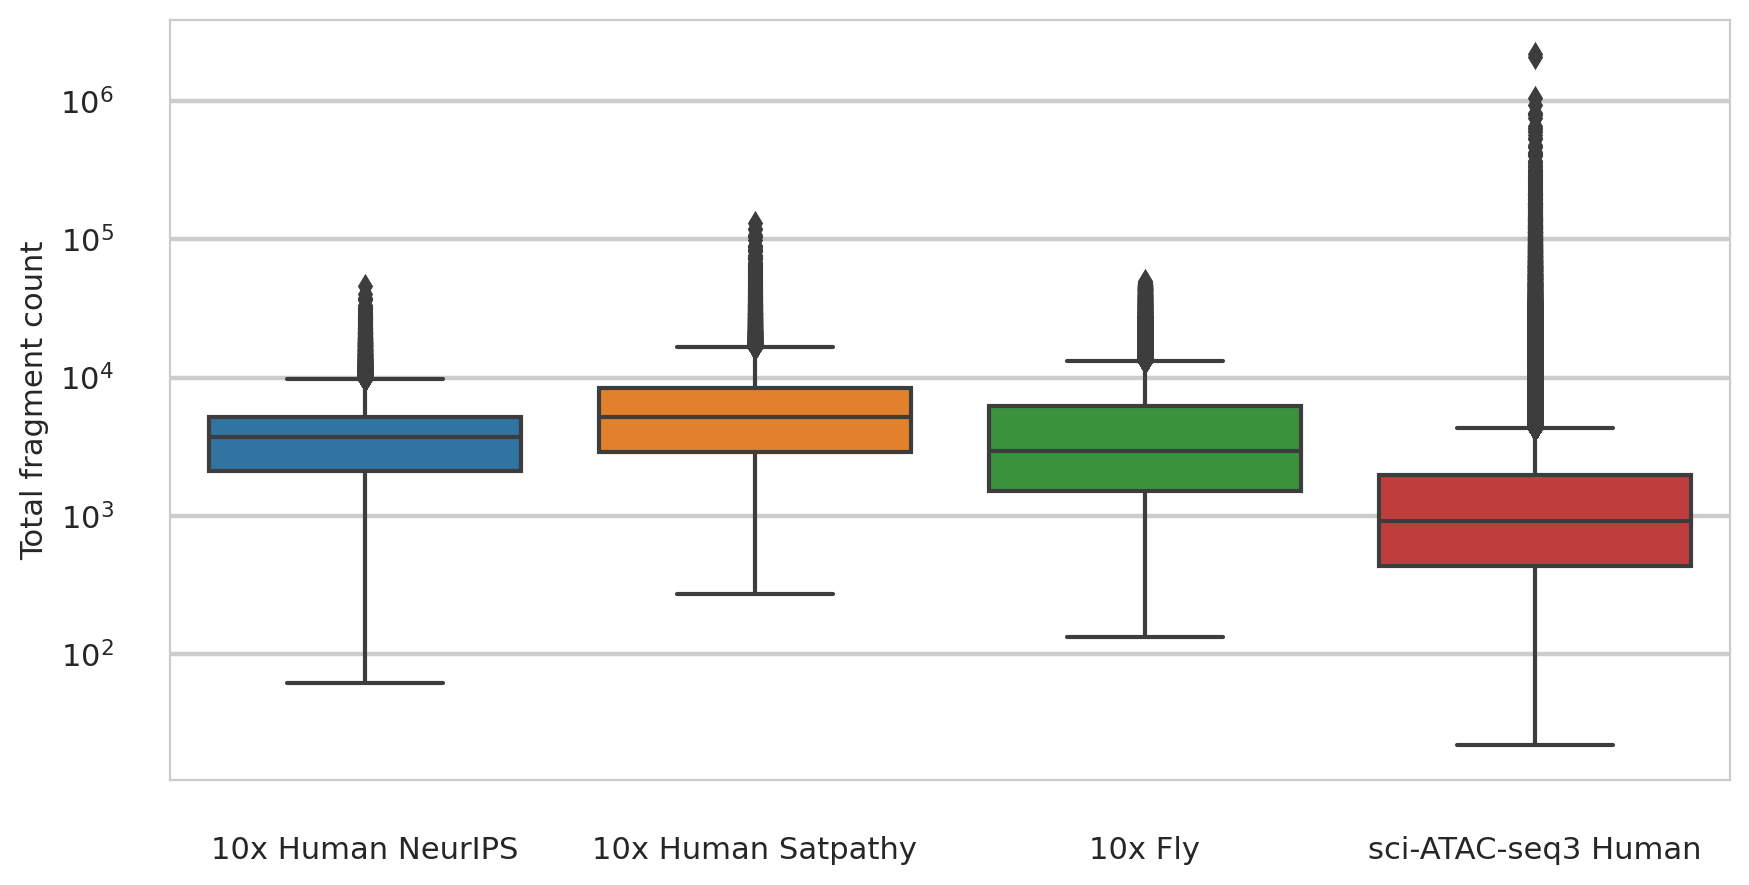

In [89]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=fragment_count, x='dataset', y='size_factor', ax=ax)
ax.set(xlabel="", ylabel='Total fragment count', yscale='log')
plt.savefig(os.path.join(fig_path, 'total_fragment_count.png'))
plt.savefig(os.path.join(fig_path, 'total_fragment_count.pdf'))

## Plot mean fragment count distribution

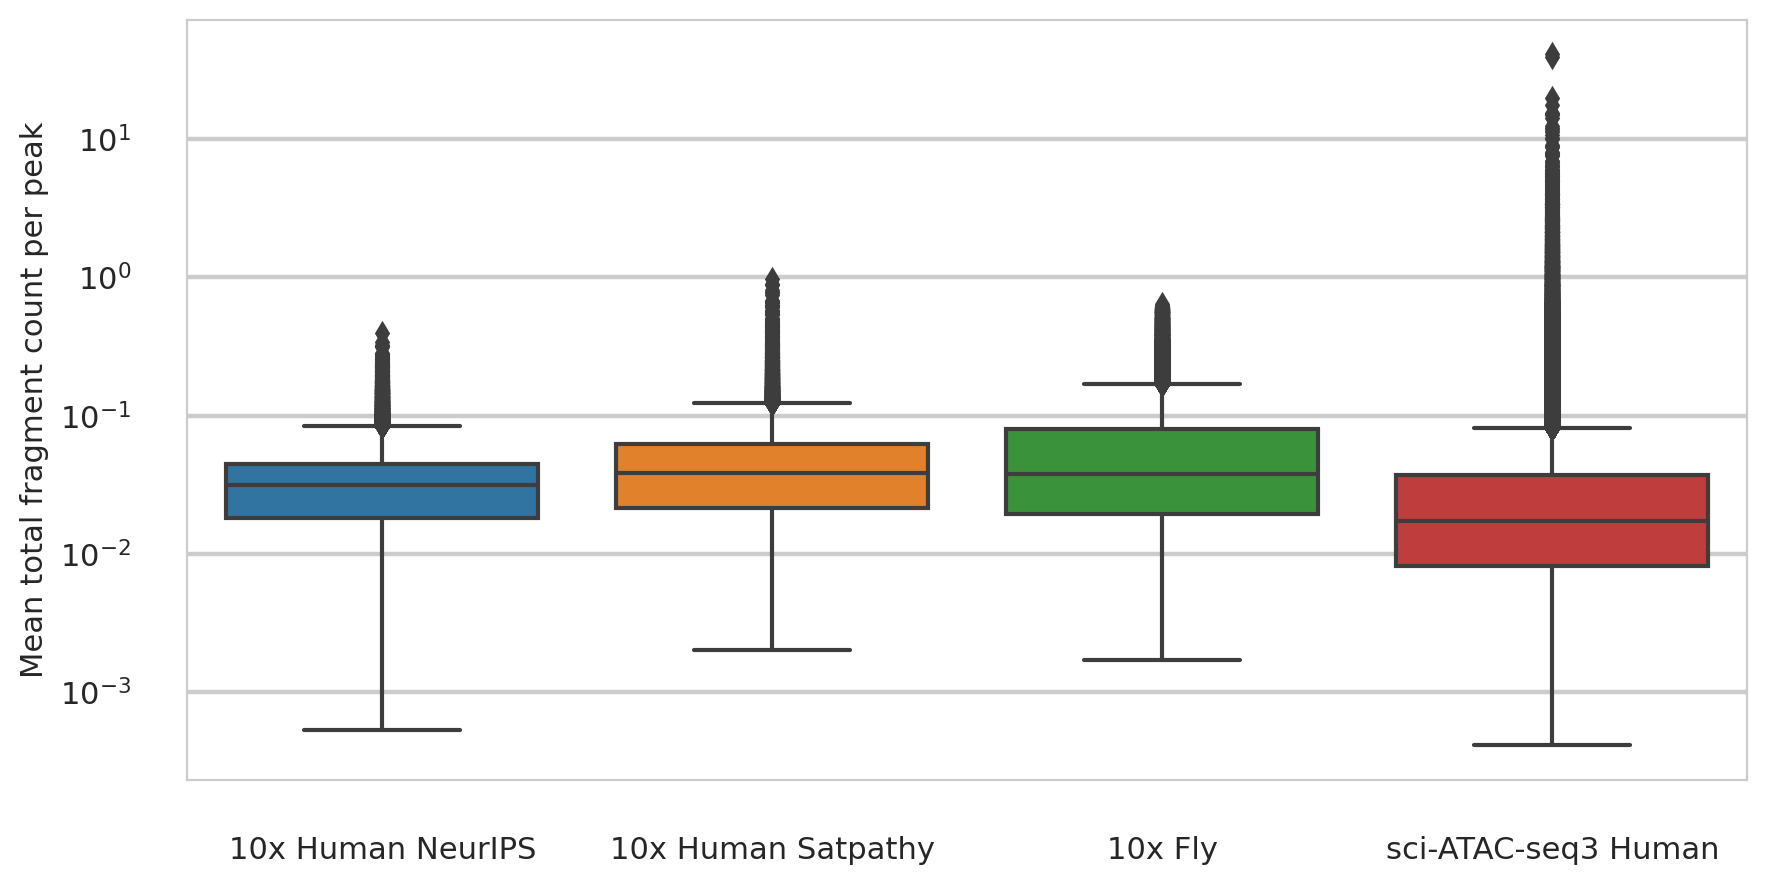

In [105]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=fragment_count, x='dataset', y='mean_size_factor', ax=ax)
ax.set(xlabel="", ylabel='Mean total fragment count per peak', yscale='log')
plt.savefig(os.path.join(fig_path, 'mean_total_fragment_count.png'))
plt.savefig(os.path.join(fig_path, 'mean_total_fragment_count.pdf'))

# Save supplementary table

In [91]:
fragment_count = fragment_count.rename({'size_factor': 'Total_Fragment_Count', 'mean_size_factor': 'Mean_Total_Fragment_Count'}, axis=1)

In [92]:
summary = fragment_count.drop('n_peaks', axis=1).groupby('dataset').describe()

In [93]:
summary.columns = summary.columns.swaplevel()

In [94]:
summary = summary.drop('count', axis=1)

In [95]:
summary.columns = summary.columns.swaplevel()

In [96]:
summary['n_cells'] = fragment_count.groupby('dataset').size()

In [97]:
summary['n_peaks'] = fragment_count.groupby('dataset').first().n_peaks

In [107]:
summary = summary.loc[[dataset_map[key] for key in ['neurips', 'satpathy', 'aerts', 'trapnell_old']]]

In [108]:
summary.to_csv('/lustre/groups/ml01/workspace/laura.martens/atac_poisson_data/panels/tables/dataset_summary.csv')

In [109]:
summary

Total_Fragment_Count                                      \
                                    mean          std    min     25%     50%   
dataset                                                                        
10x Human NeurIPS            4094.800307  2958.046422   62.0  2106.0  3696.0   
10x Human Satpathy           6301.975627  5109.367400  271.0  2899.0  5149.0   
10x Fly                      5018.921301  5856.603881  134.0  1506.0  2935.0   
sci-ATAC-seq3 Human          2106.901377  7390.499968   22.0   432.0   913.0   

                                        Mean_Total_Fragment_Count            \
                         75%        max                      mean       std   
dataset                                                                       
10x Human NeurIPS    5191.00    45699.0                  0.035152  0.025393   
10x Human Satpathy   8336.75   130461.0                  0.046993  0.038100   
10x Fly              6198.00    49562.0                  0.064462  0.075222   
sci-ATAC-seq3 Human  1974.00  2160033.0                  0.039706  0.139278   

                                                                        \
                          min       25%       50%       75%        max   
dataset                                                                  
10x Human NeurIPS    0.000532  0.018079  0.031728  0.044562   0.392300   
10x Human Satpathy   0.002021  0.021618  0.038396  0.062166   0.972835   
10x Fly              0.001721  0.019343  0.037697  0.079606   0.636569   
sci-ATAC-seq3 Human  0.000415  0.008141  0.017206  0.037201  40.706952   

                    n_cells n_peaks  
                                     
dataset                              
10x Human NeurIPS     62501  116490  
10x Human Satpathy    63882  134104  
10x Fly              117613   77858  
sci-ATAC-seq3 Human  720613   53063